# Análise Global e Sexo da Vítima / Sexo do Criminoso

## Realizar uma investigação global dos casos de homicídio e realizar uma investigação específica relacionando o sexo da vítima, sexo do criminoso e encontrar uma correlação entre a arma utilizada e o sexo do criminoso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE # Para tratar dataset desbalanceado

import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO

# Análise da Tendência dos Casos de Homicídios ao Longo dos Anos

In [2]:
# https://www.kaggle.com/murderaccountability/homicide-reports
ds = pd.read_csv("database.csv")

#Checar status e tipos de variáveis
ds.info()
print('\n')
#Chegar se existe observações duplicadas. Não existem observações duplicadas.
print(ds.duplicated().value_counts())
print('\n')
#Não existe dados ausentes
ds.isna().sum()

C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

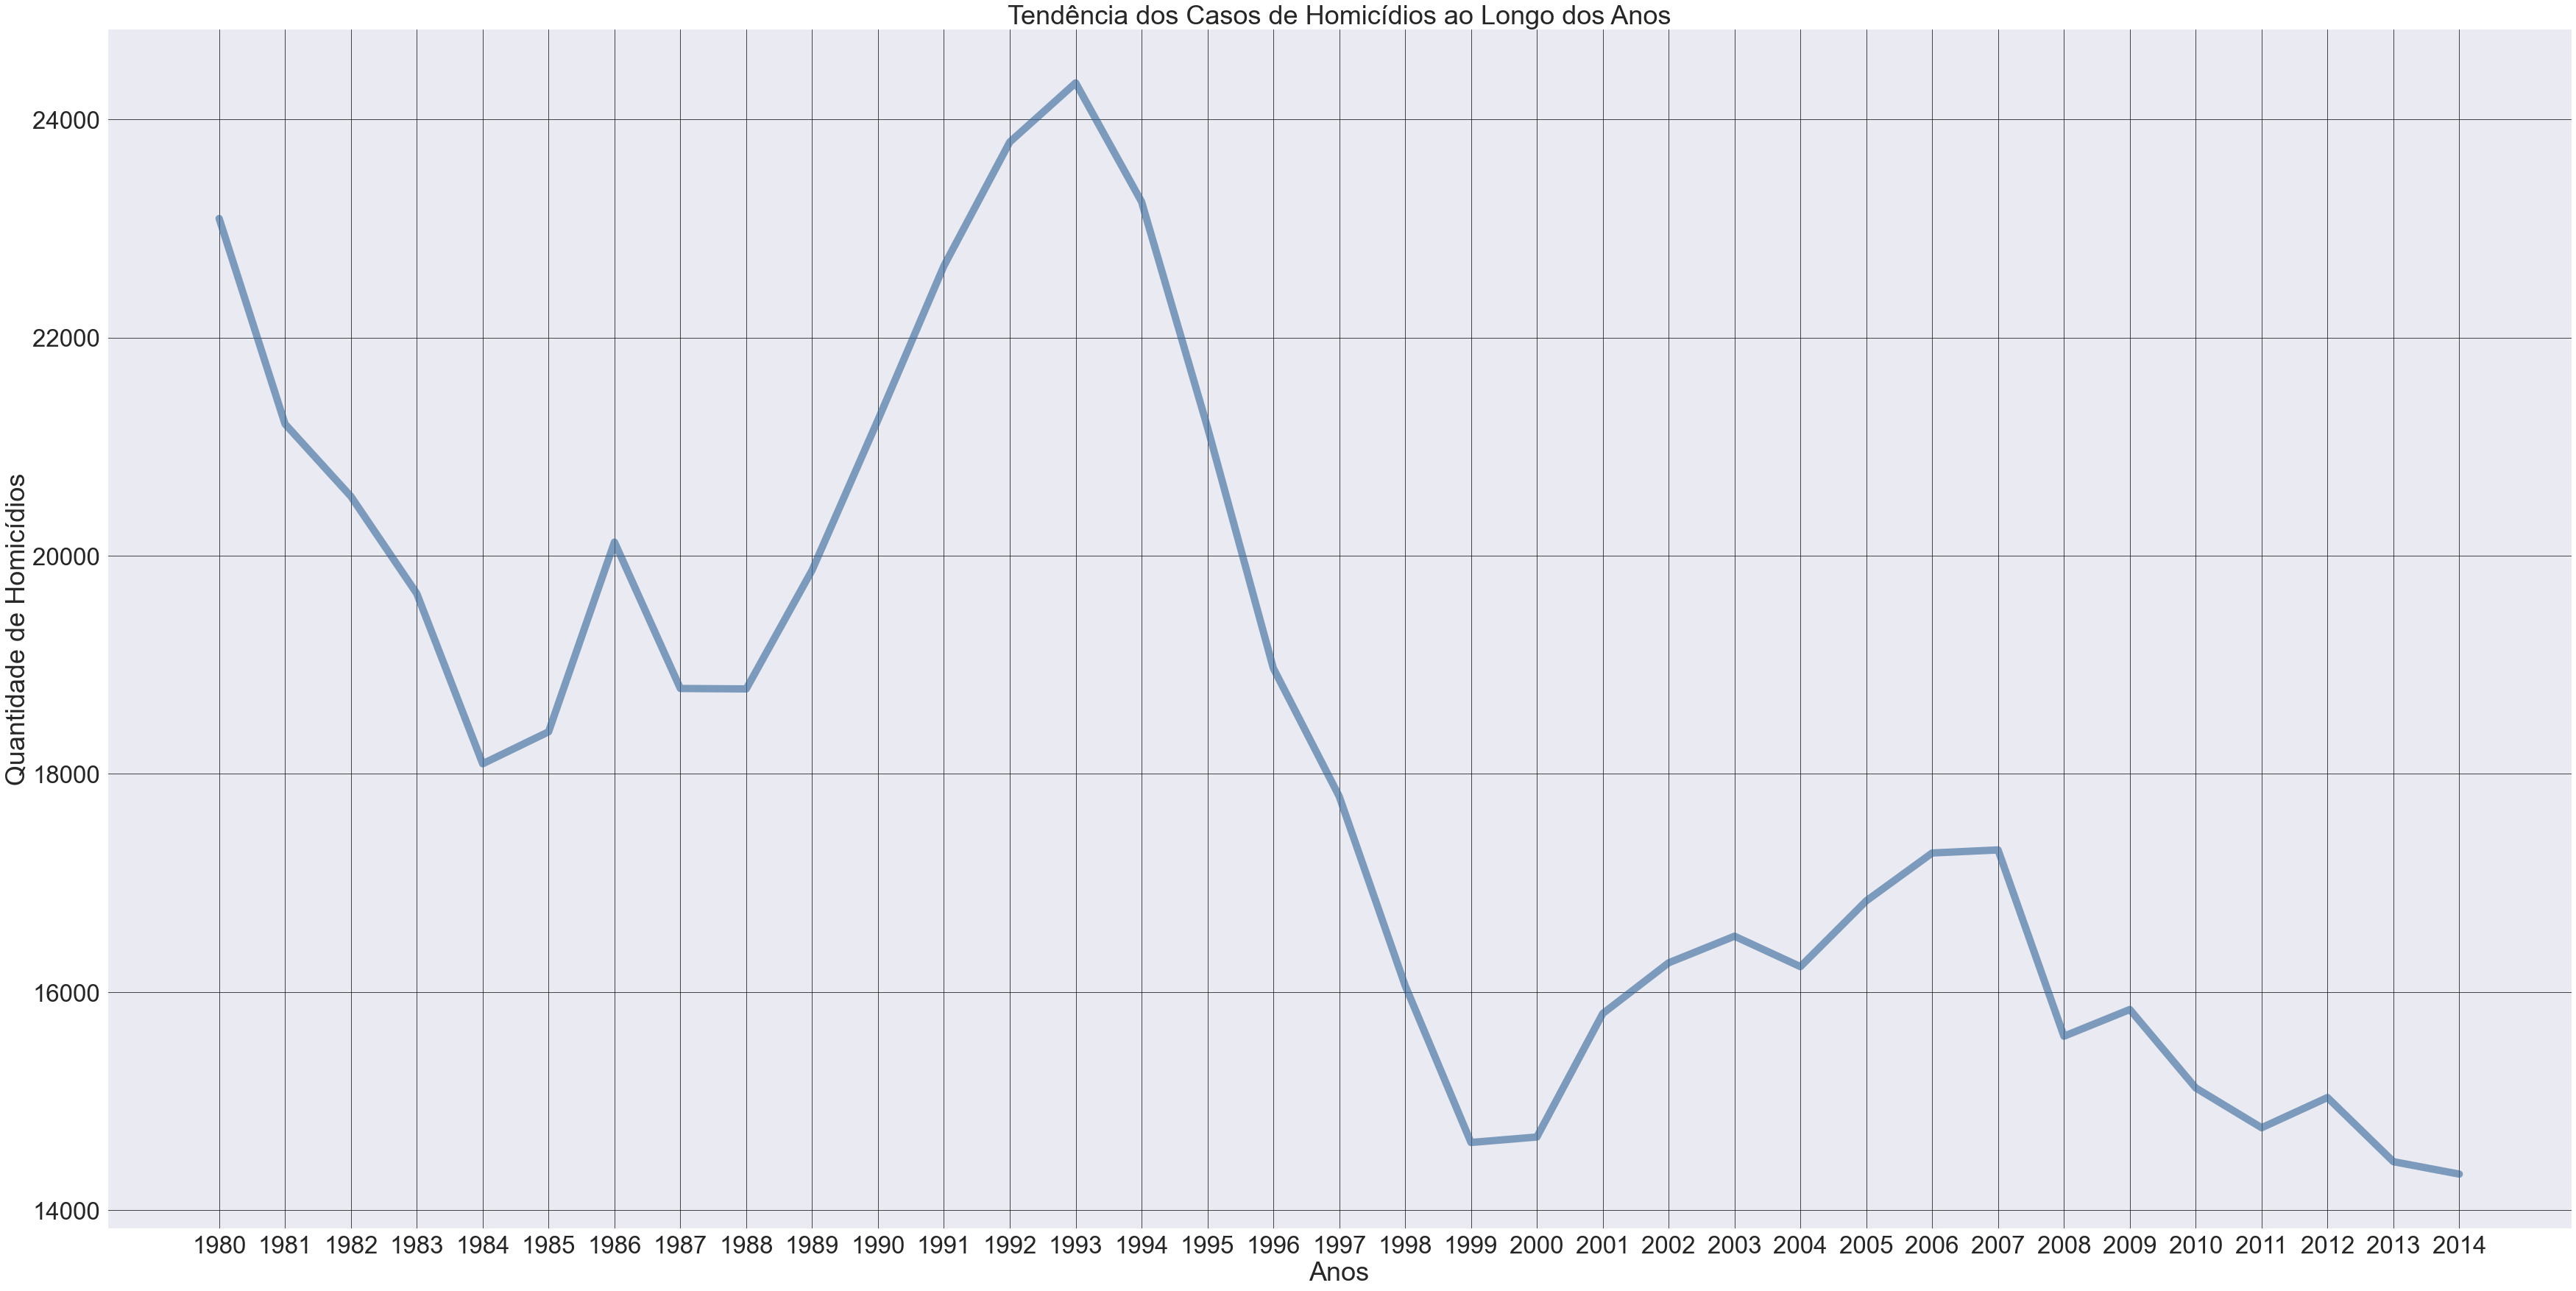

In [5]:
# analisar  a tendência dos os casos de homicídeo
t = ds['Year'].value_counts()
t = t.sort_index()
r = [' ']*(2015-1980)
i = 0
for j in range(1980, 2015):
    r[i] = str(j)
    i = i + 1
    
sns.set_style('darkgrid')
# Cor em RGBA (0.2, 0.4, 0.6, 0.6)
sns.lineplot(r,t,color=(0.2, 0.4, 0.6, 0.6),linewidth=10)
sns.set(font_scale = 3)

plt.rcParams['figure.figsize'] = [60, 30]
plt.title("Tendência dos Casos de Homicídios ao Longo dos Anos")
plt.ylabel('Quantidade de Homicídios')
plt.xlabel('Anos')
plt.grid(color='black', linewidth=0.7)
plt.show()

In [3]:
#GDPpc -> produto interno bruto per capita anos 1980 - 2014
GDPpc = [39.1,40,39.9,41,41.9,42.6,43.6,43.9,44.4,44.8,45.6,46.2,
         47.8,47.9,48.4,48.5,49.7,50.4,51.5,53,54.5,55.7,57.2,59,60.5,61.8,
         62.4,63.2,64,66.1,67.8,67.9,68.1,68.4,68.6]

f = ds['Year'].value_counts().sort_index().to_frame()
print(f.head())
d = {'Homicídios':f['Year'].to_list(),'PIB':GDPpc}
dftemp = pd.DataFrame(data=d)

print(dftemp.corr())

dftemp['Anos'] = range(1980,2015)
dftemp.head()



pearson_coef, p_value = stats.pearsonr(f['Year'].to_list(), GDPpc)
print("Coeficiente de correlação de Pearson = ", pearson_coef, "P-value = ", p_value) 

       Year
1980  23092
1981  21208
1982  20544
1983  19653
1984  18093
            Homicídios       PIB
Homicídios    1.000000 -0.746573
PIB          -0.746573  1.000000
Coeficiente de correlação de Pearson =  -0.7465726085866145 P-value =  2.609802422213093e-07


NameError: name 'color' is not defined

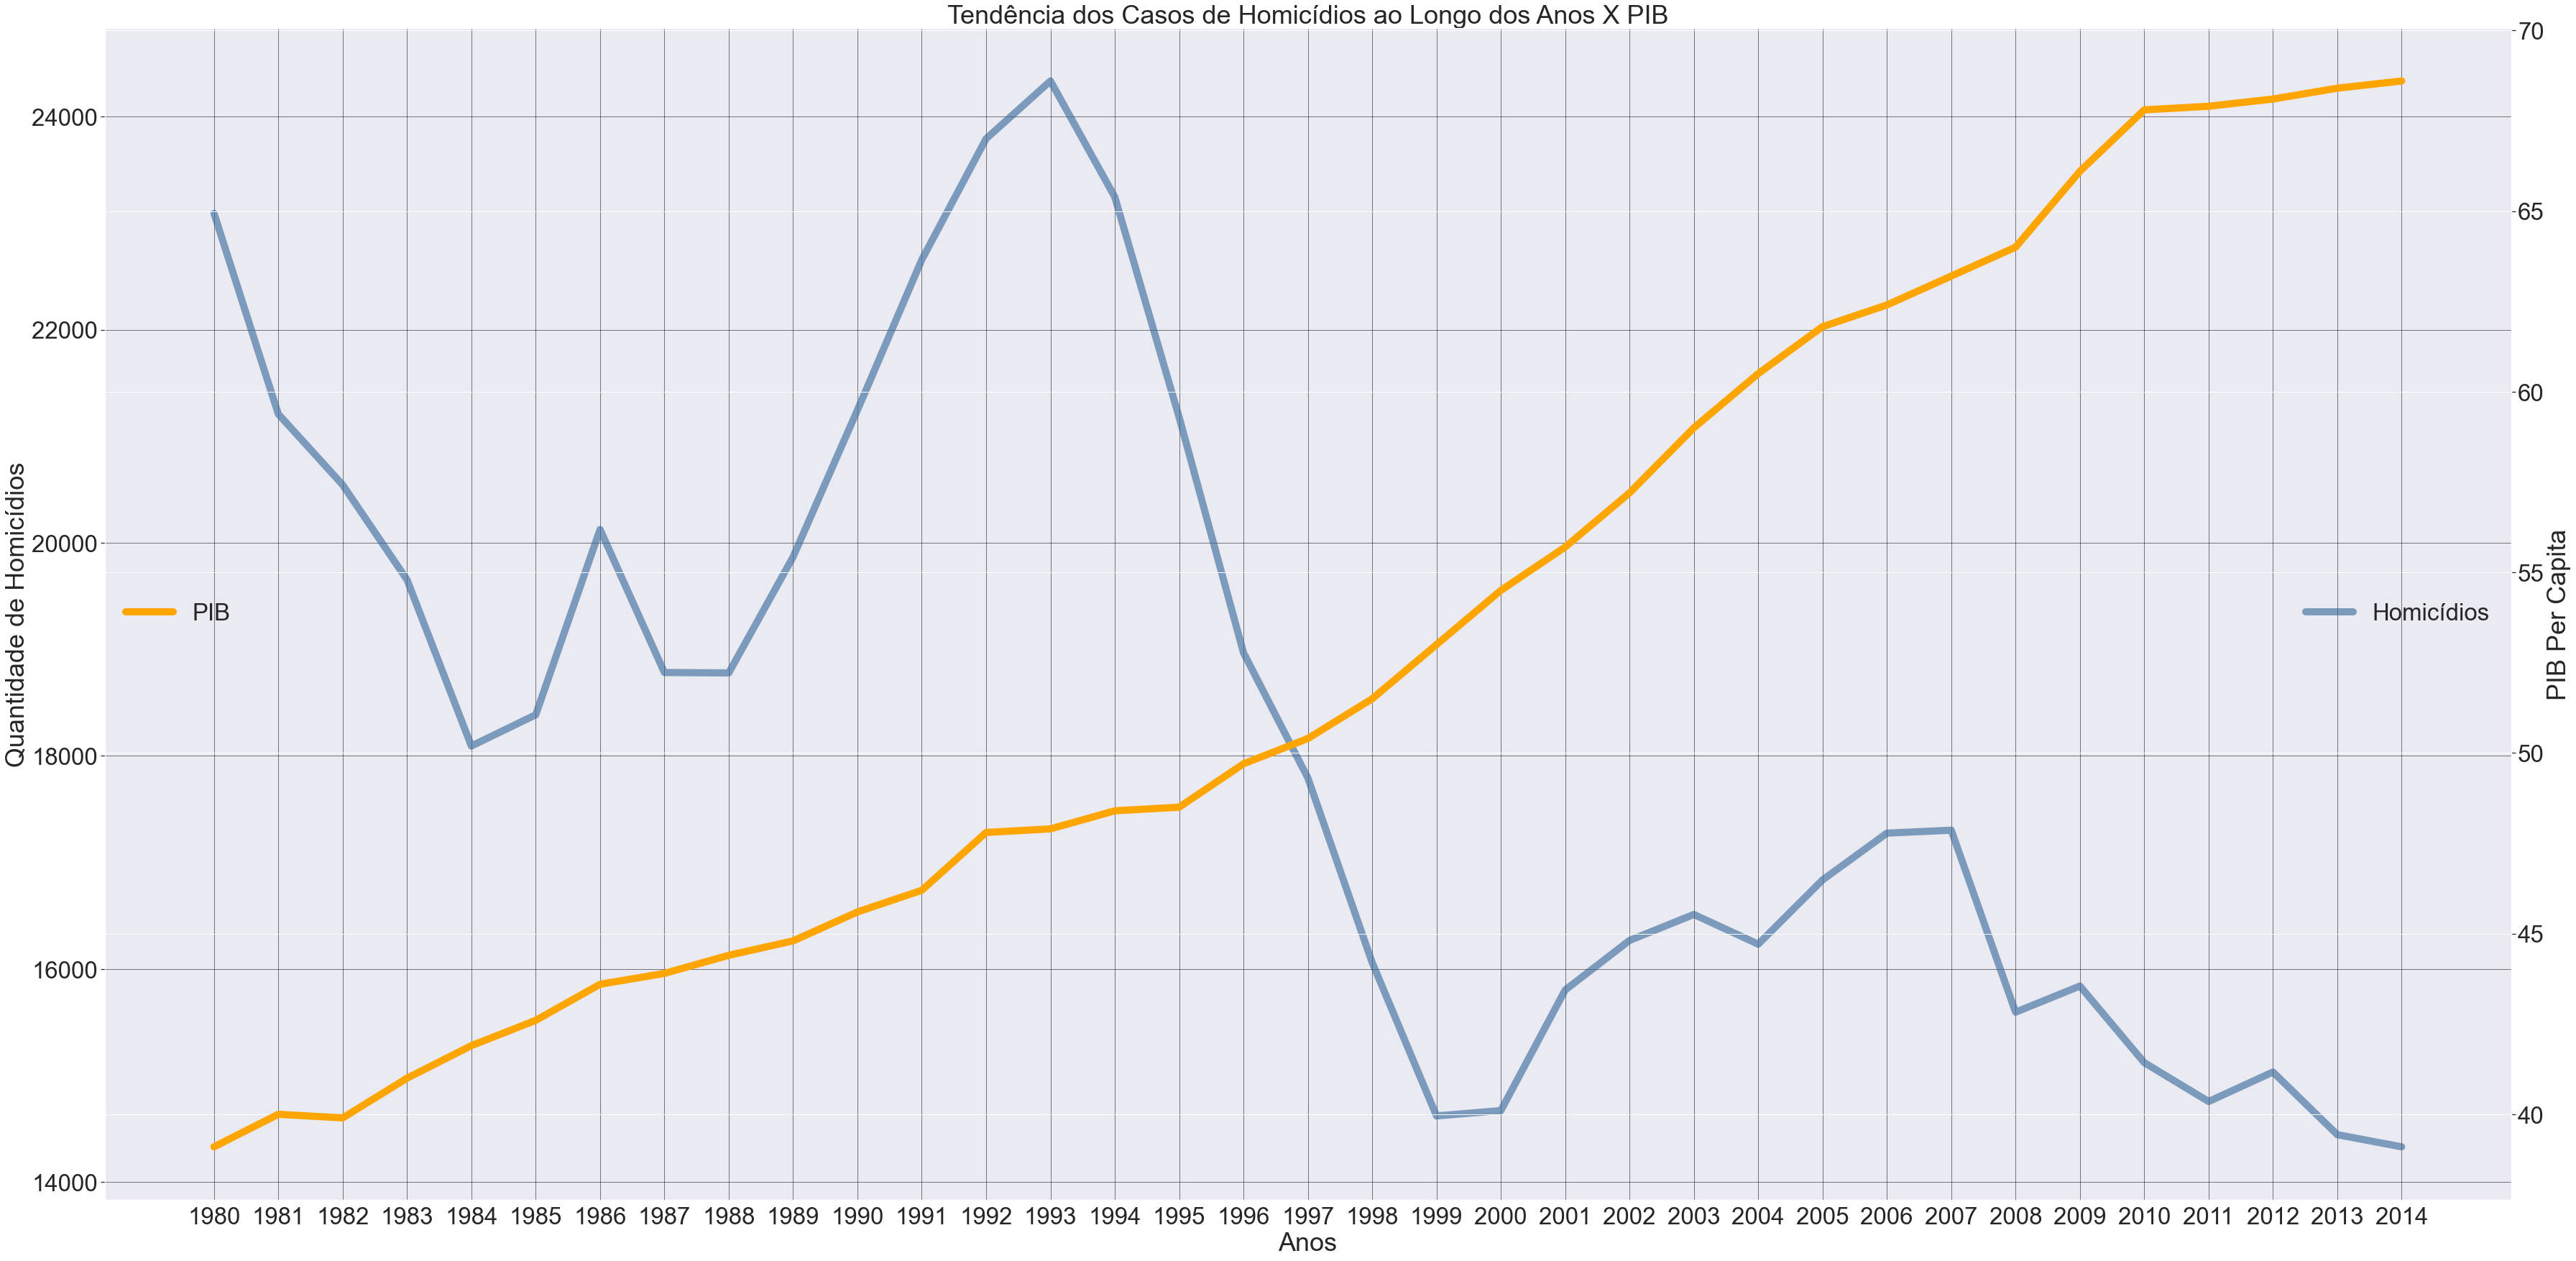

In [12]:
# analisar  a tendência dos os casos de homicídeo
t = ds['Year'].value_counts()
t = t.sort_index()
r = [' ']*(2015-1980)
i = 0
for j in range(1980, 2015):
    r[i] = str(j)
    i = i + 1
    
fig, ax1 = plt.subplots()
plt.grid(color='black', linewidth=0.5)
ax1.set_title('Tendência dos Casos de Homicídios ao Longo dos Anos X PIB')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Quantidade de Homicídios')
# Cor em RGBA (0.2, 0.4, 0.6, 0.6)
ax2 = sns.lineplot(r,t,color=(0.2, 0.4, 0.6, 0.6),linewidth=10, label='Homicídios')
ax1.tick_params(axis='y')
ax1.legend(frameon=False, loc='center right', ncol=2);
ax2 = ax1.twinx()
ax2.set_ylabel('PIB Per Capita')
ax2 = sns.lineplot(r,GDPpc, sort=False, color='Orange',linewidth=10, label='PIB')
ax2.set(xlabel=None)
ax2.legend(frameon=False, loc='center left', ncol=2);
ax2.tick_params(axis='y', color=color)
sns.set_style('darkgrid')

sns.set(font_scale = 4.5)
plt.rcParams['figure.figsize'] = [60, 30]
plt.grid(color='black', linewidth=0.7)

plt.show()

# Análise Comparativa de Violência entre Sexos

## Será feita a análise dos crimes de homens contra mulheres, mulheres contra homens, homens contra homens e mulheres contra mulheres.

In [3]:
#Avalia as categorias das variáveis 'Crime Solved', 'Perpetrator Sex' e 'Victim Sex'
print(ds['Crime Solved'].value_counts())
print('\n')
print(ds['Perpetrator Sex'].value_counts())
print('\n')
print(ds['Victim Sex'].value_counts())

Yes    448172
No     190282
Name: Crime Solved, dtype: int64


Male       399541
Unknown    190365
Female      48548
Name: Perpetrator Sex, dtype: int64


Male       494125
Female     143345
Unknown       984
Name: Victim Sex, dtype: int64


In [4]:
#Considerar apenas os crimes em que se conhece os sexos das vítimas e criminosos e que foram solucionados pela polícia
dsTrabalho = ds[(ds['Crime Solved']=='Yes') & (ds['Perpetrator Sex']!='Unknown') & (ds['Victim Sex']!='Unknown')]
dsTrabalho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447694 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              447694 non-null  int64 
 1   Agency Code            447694 non-null  object
 2   Agency Name            447694 non-null  object
 3   Agency Type            447694 non-null  object
 4   City                   447694 non-null  object
 5   State                  447694 non-null  object
 6   Year                   447694 non-null  int64 
 7   Month                  447694 non-null  object
 8   Incident               447694 non-null  int64 
 9   Crime Type             447694 non-null  object
 10  Crime Solved           447694 non-null  object
 11  Victim Sex             447694 non-null  object
 12  Victim Age             447694 non-null  int64 
 13  Victim Race            447694 non-null  object
 14  Victim Ethnicity       447694 non-null  object
 15  

In [5]:
#Avalia a existência de informações sobre as idades das vítimas que foram mal colocadas.
#dsTrabalho.boxplot(column=['Victim Age'])
dsTrabalho['Victim Age'].describe()

count    447694.000000
mean         33.547412
std          25.112673
min           0.000000
25%          22.000000
50%          30.000000
75%          42.000000
max         998.000000
Name: Victim Age, dtype: float64

In [6]:
#Note que existe uma pessoa (vítima) com idade 998. Deve-se retirar essa observação do dataset.
print(dsTrabalho[dsTrabalho['Victim Age']>65]['Victim Age'].value_counts())
dsTrabalho = dsTrabalho[dsTrabalho['Victim Age']!=998]

99     4445
67     1444
66     1349
68     1320
70     1249
69     1223
72     1145
71     1117
73     1037
75     1028
74      979
76      864
77      846
78      790
79      787
80      784
81      658
82      606
83      543
84      469
85      458
86      411
87      312
88      289
89      224
90      202
998     154
91      149
92      110
93       96
94       84
95       58
97       24
98       24
96       22
Name: Victim Age, dtype: int64


In [7]:
#Note que os valores da variável 'Perpetrator Age' não tem um tipo numérico definido e são tratados como objeto.
#Também, avalia a existência de informações sobre as idades dos criminosos que foram mal colocadas.

#Transformando dados da variável 'Perpetrator Age' para inteiro.
dsTrabalho['Perpetrator Age'] = dsTrabalho['Perpetrator Age'].astype('int')
print(dsTrabalho['Perpetrator Age'].describe())
print('\n')

#Nota-se que algumas idades dos criminosos não fazem sentido, por exemplo, idade 0 e idade 1.
#Nesse caso, será considerado apenas os crimes cujas idades dos criminosos é maior ou igual a 18 anos.
print(dsTrabalho[dsTrabalho['Perpetrator Age']<18]['Perpetrator Age'].value_counts())
print('\n')
dsTrabalho = dsTrabalho[dsTrabalho['Perpetrator Age']>=18]
print(dsTrabalho['Perpetrator Age'].describe())

count    447540.000000
mean         28.909659
std          14.356867
min           0.000000
25%          20.000000
50%          26.000000
75%          36.000000
max          99.000000
Name: Perpetrator Age, dtype: float64


0     26508
17    14173
16     9393
15     5418
14     2565
13     1108
12      483
11      225
10      145
9        86
8        62
6        50
7        48
5        30
4        29
3        24
1        16
2         6
Name: Perpetrator Age, dtype: int64


count    387171.000000
mean         32.036033
std          12.489364
min          18.000000
25%          22.000000
50%          29.000000
75%          38.000000
max          99.000000
Name: Perpetrator Age, dtype: float64


In [8]:
#Reseta os índices do dataset
dsTrabalho = dsTrabalho.reset_index()
#Cria um dataset específico com apenas as duas variáveis 'Year','Perpetrator Sex' e 'Victim Sex'
hmds = dsTrabalho[['Year','Perpetrator Sex','Victim Sex','Weapon']]
hmds.info()
hmds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387171 entries, 0 to 387170
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             387171 non-null  int64 
 1   Perpetrator Sex  387171 non-null  object
 2   Victim Sex       387171 non-null  object
 3   Weapon           387171 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.8+ MB


,Year,Perpetrator Sex,Victim Sex,Weapon
0,1980,Male,Male,Strangulation
1,1980,Male,Male,Strangulation
2,1980,Male,Male,Rifle
3,1980,Male,Female,Knife
4,1980,Male,Female,Knife


##### Aqui está sendo criado uma nova variável chamada “Relação” (através da função ft() ), onde se relaciona o sexo do criminoso com o sexo da vítima. Por exemplo, se um homem (male - macho) for o criminoso contra uma mulher (female - feminino) vítima, então se escreve a observação como M_x_F.

In [9]:
#Função para criar uma nova variável - "Relação"
def ft(hmds):
    #Quantidade de linhas - ob
    ob = hmds.shape[0]
    #Cria vetor de objetos - x, c, v
    x = ["x"]*ob
    c = ["x"]*ob
    v = ["x"]*ob
  
    for i in range(0,ob):
        #Variável 'Perpetrator Sex'
        if(hmds['Perpetrator Sex'][i]=="Male"):
            c[i] = "M_x_"
        
        else:
            c[i] = "F_x_"
    
        #Variável 'Victim Sex'
        if(hmds['Victim Sex'][i]=="Male"):
            v[i] = "M"
        
        else:
            v[i] = "F"

    for i in range(0,ob):
        x[i] = c[i] + v[i]
    
    hmds["Relação"] = x
  
    return hmds

#Retorna o dataset com a nova variável
hmds = ft(hmds)

hmds.info()
hmds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387171 entries, 0 to 387170
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             387171 non-null  int64 
 1   Perpetrator Sex  387171 non-null  object
 2   Victim Sex       387171 non-null  object
 3   Weapon           387171 non-null  object
 4   Relação          387171 non-null  object
dtypes: int64(1), object(4)
memory usage: 14.8+ MB


C:\Users\John\AppData\Local\Temp/ipykernel_26876/4159165890.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmds["Relação"] = x


,Year,Perpetrator Sex,Victim Sex,Weapon,Relação
0,1980,Male,Male,Strangulation,M_x_M
1,1980,Male,Male,Strangulation,M_x_M
2,1980,Male,Male,Rifle,M_x_M
3,1980,Male,Female,Knife,M_x_F
4,1980,Male,Female,Knife,M_x_F


### Quem cometeu ou quem sofreu mais crimes, homem ou mulher?
#### Os gráficos abaixo mostram a frenquência de crimes cometidos ou sofridos para cada sexo. Conclui-se que os homens cometeram mais crimes que as mulheres nos Estados Unidos, período 1980-2014. No entando, foram os homens quem mais sofreram com os crimes.

C:\Users\John\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


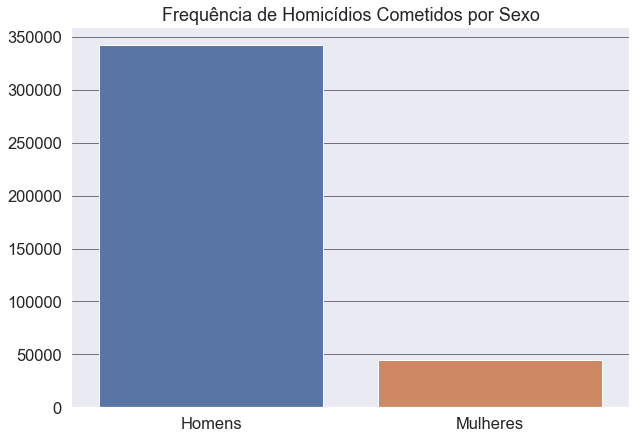

In [15]:
cf = hmds['Perpetrator Sex'].value_counts()

sns.set_style('darkgrid')
sns.barplot(["Homens","Mulheres"],cf)
sns.set(font_scale = 1.5)
#plt.figure(figsize=(200, 200))
plt.rcParams['figure.figsize'] = [10, 7]

plt.title("Frequência de Homicídios Cometidos por Sexo")
plt.ylabel('')
plt.grid(axis='y',color='black', linewidth=0.5)
plt.show()

C:\Users\John\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


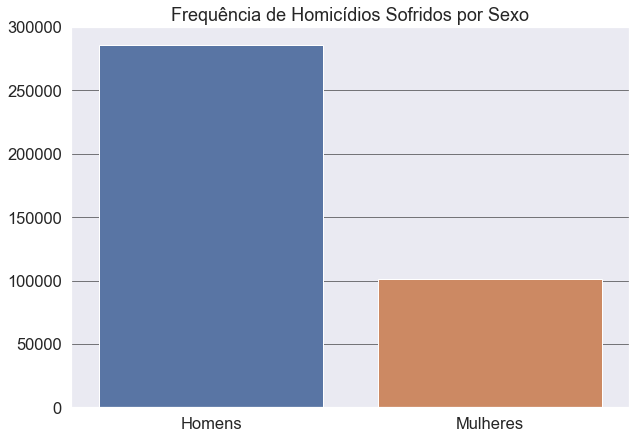

In [16]:
vf = hmds['Victim Sex'].value_counts()

sns.set_style('darkgrid')
sns.barplot(["Homens","Mulheres"],vf)
sns.set(font_scale = 1.5)

plt.rcParams['figure.figsize'] = [10, 7]
plt.title("Frequência de Homicídios Sofridos por Sexo")
plt.ylabel('')
plt.grid(axis='y',color='black', linewidth=0.5)
plt.show()

### Qual a tendência dos crimes cometidos por sexo ao longo dos anos?

C:\Users\John\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\John\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


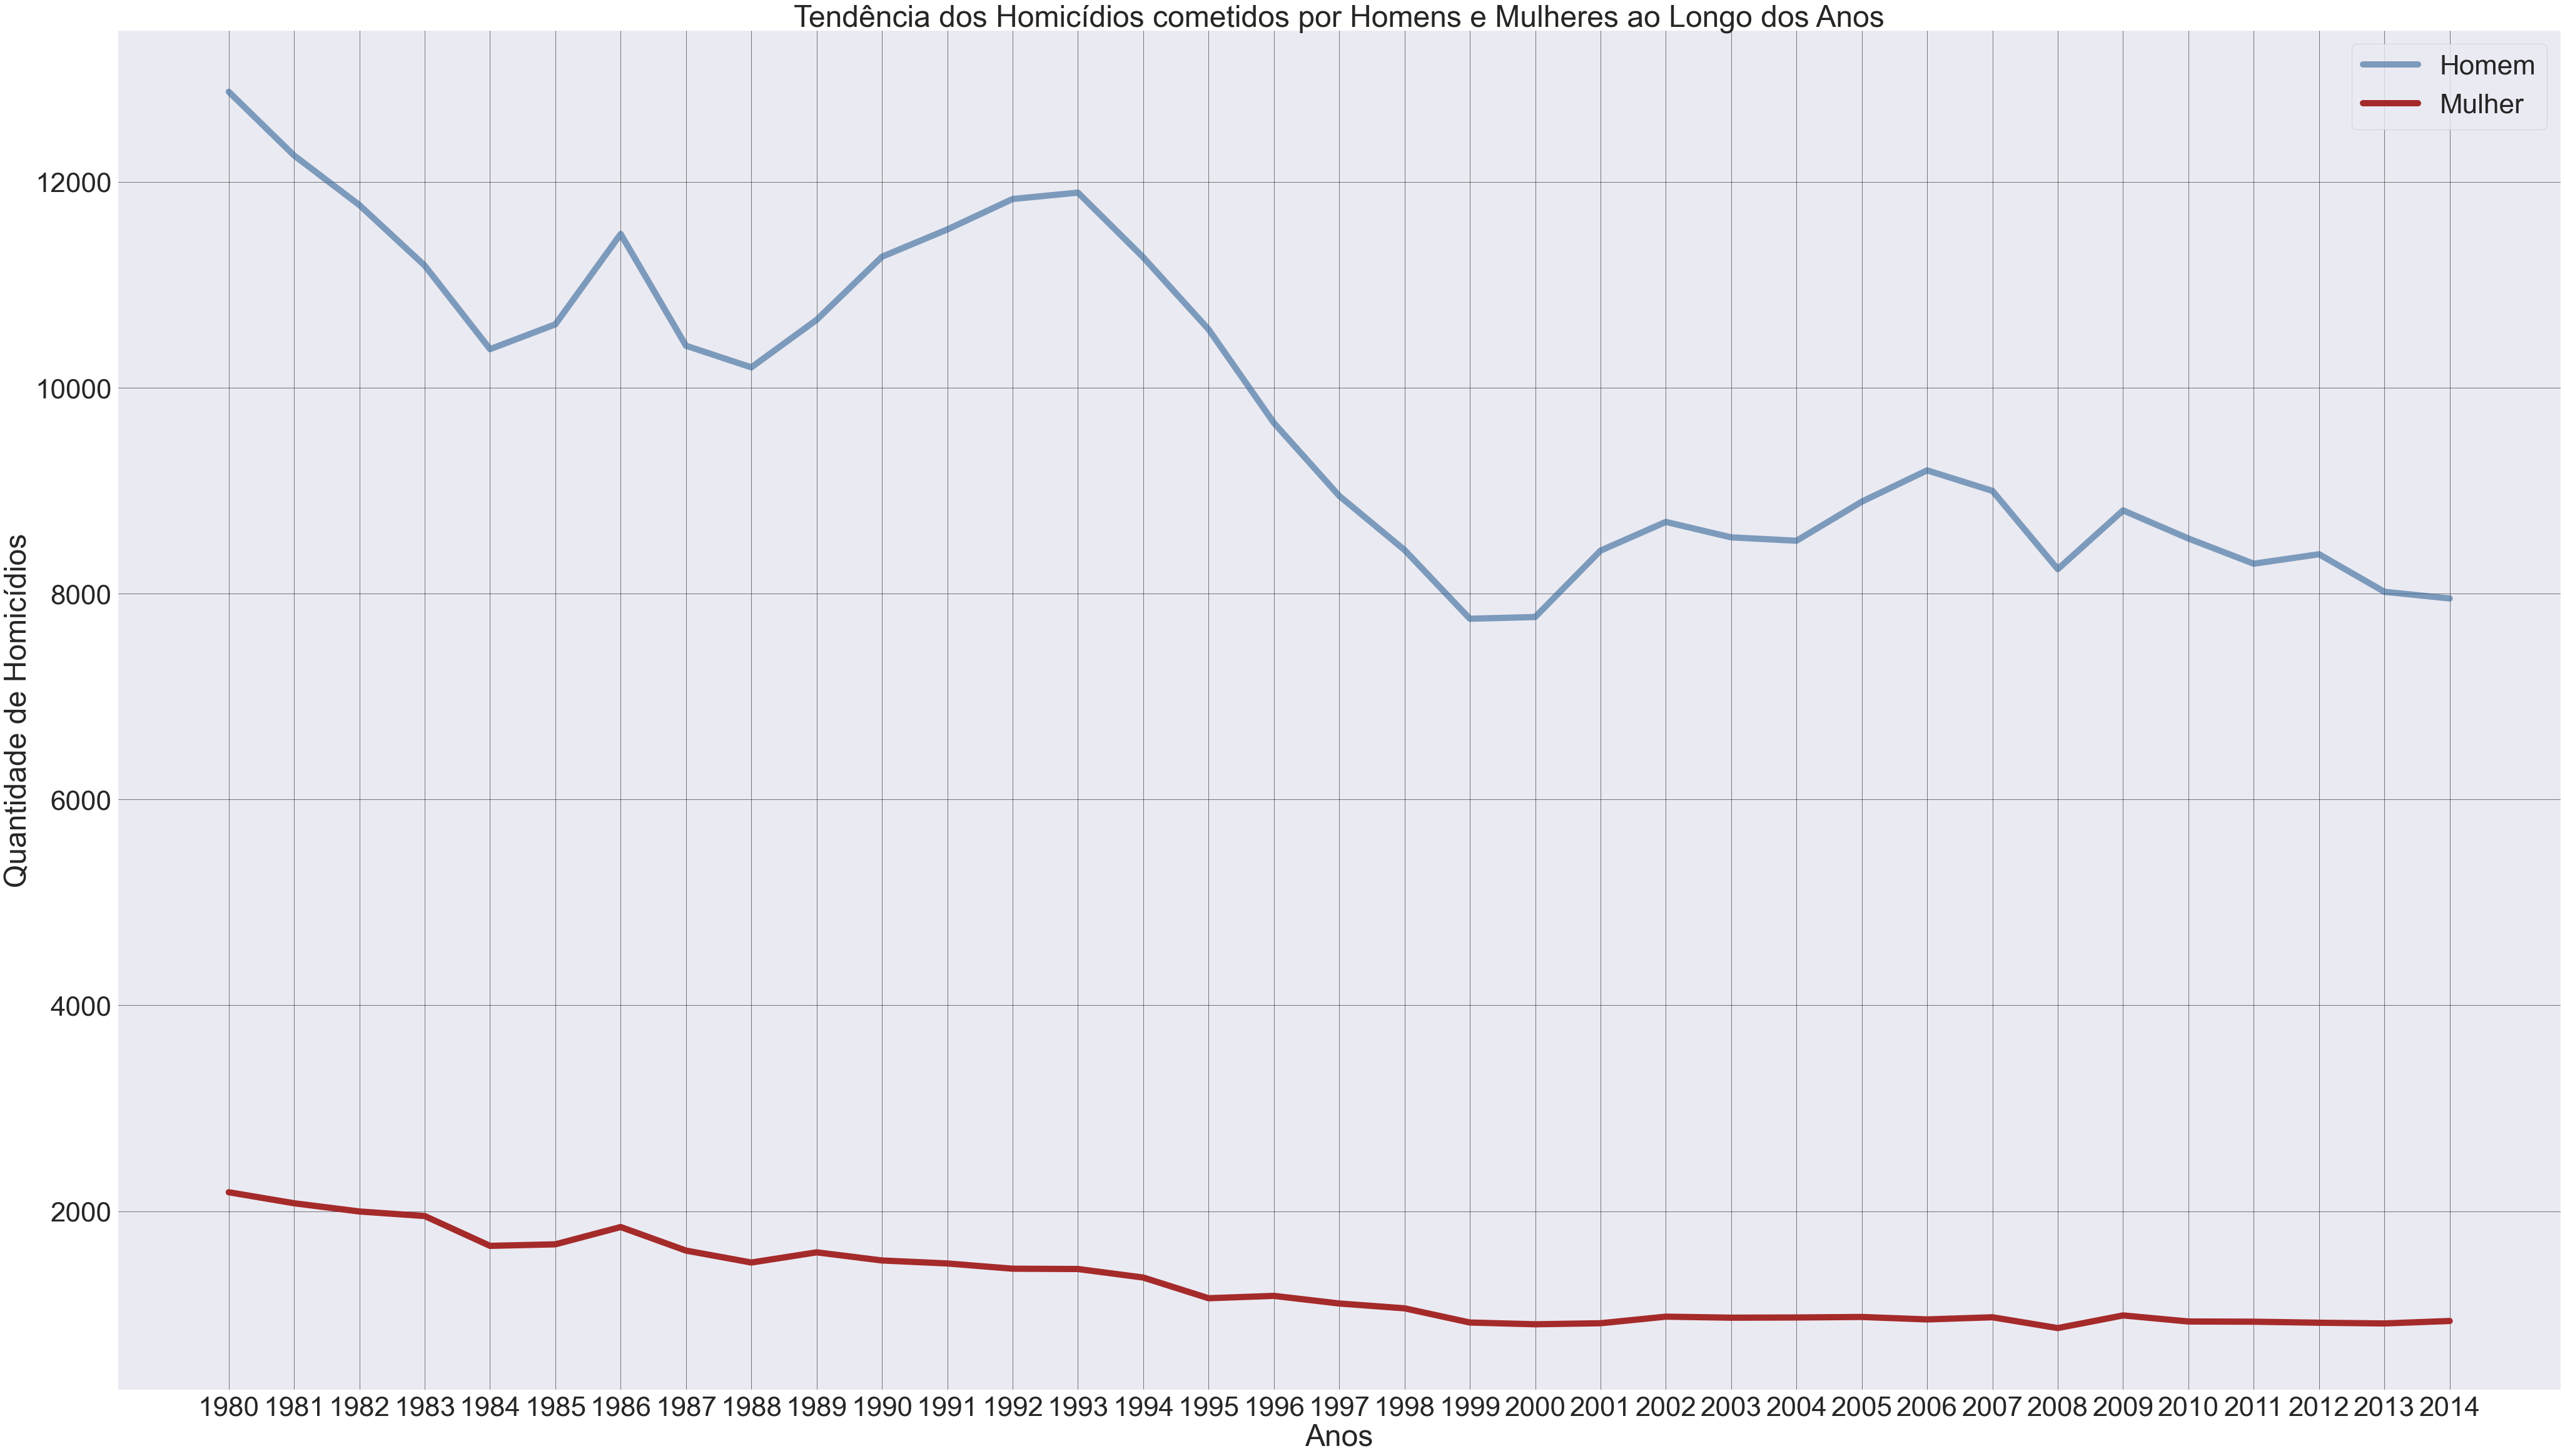

'\n# Cor em RGBA (0.2, 0.4, 0.6, 0.6)\nsns.barplot(t,f,color=(0.2, 0.4, 0.6, 0.6))\nsns.set(font_scale = 4)\n\nplt.rcParams[\'figure.figsize\'] = [50, 35]\nplt.title("Frequência de Homicídios por Ano")\nplt.ylabel(\'\')\nplt.xlabel(\'Anos\')\nplt.grid(axis=\'y\',color=\'black\', linewidth=0.5)\nplt.show()\n'

In [18]:
# aux -> dataset auxiliar
auxm = hmds[hmds['Perpetrator Sex']=='Male']
auxf = hmds[hmds['Perpetrator Sex']=='Female']
fm = auxm['Year'].value_counts()
fm = fm.sort_index()
ff = auxf['Year'].value_counts()
ff = ff.sort_index()
t = [' ']*(2015-1980)
i = 0
for j in range(1980, 2015):
    t[i] = str(j)
    i = i + 1

sns.set_style('darkgrid')
sns.lineplot(t,fm,color=(0.2, 0.4, 0.6, 0.6),linewidth=10, label='Homem')
sns.lineplot(t,ff,color='brown',linewidth=10, label='Mulher')
sns.set(font_scale = 4)

plt.rcParams['figure.figsize'] = [70, 40]
plt.title("Tendência dos Homicídios cometidos por Homens e Mulheres ao Longo dos Anos")
plt.ylabel('Quantidade de Homicídios')
plt.xlabel('Anos')
plt.grid(color='black', linewidth=0.5)
#plt.savefig("output.png", dpi=300)
plt.legend()
plt.show()
#########################################################################

'''
# Cor em RGBA (0.2, 0.4, 0.6, 0.6)
sns.barplot(t,f,color=(0.2, 0.4, 0.6, 0.6))
sns.set(font_scale = 4)

plt.rcParams['figure.figsize'] = [50, 35]
plt.title("Frequência de Homicídios por Ano")
plt.ylabel('')
plt.xlabel('Anos')
plt.grid(axis='y',color='black', linewidth=0.5)
plt.show()
'''


C:\Users\John\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\John\anaconda3\envs\project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


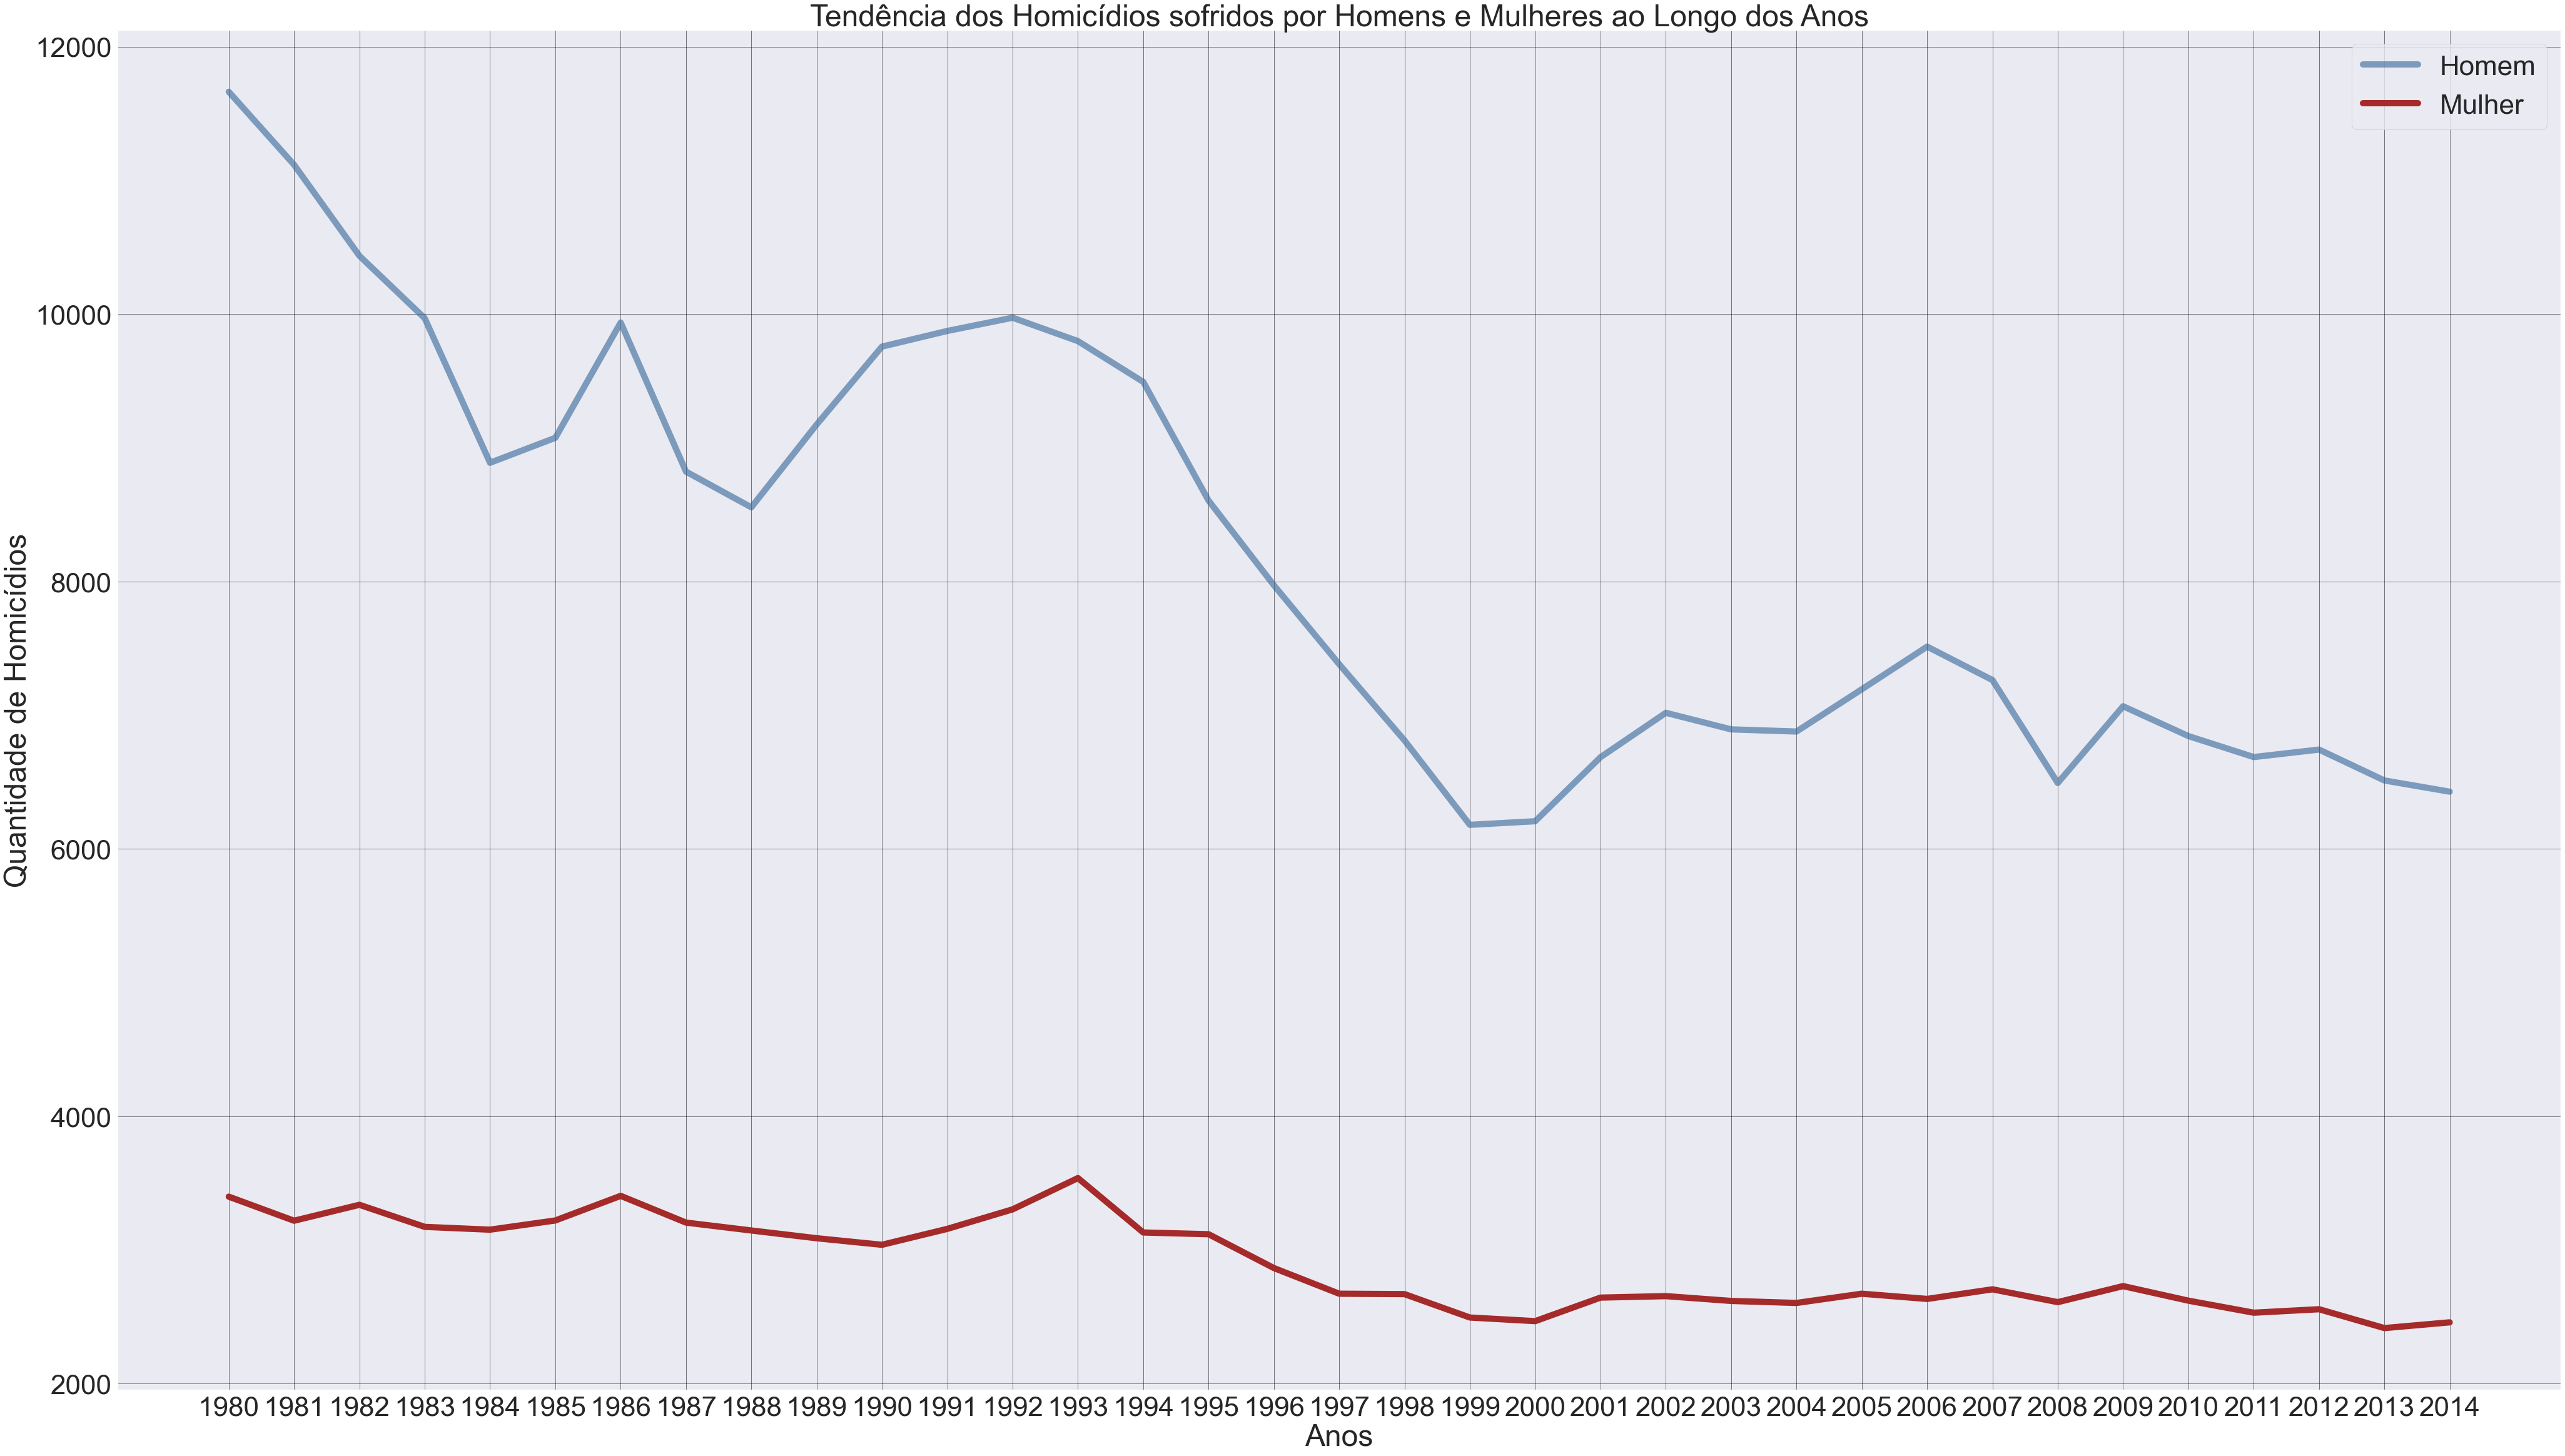

In [19]:
auxm = hmds[hmds['Victim Sex']=='Male']
auxf = hmds[hmds['Victim Sex']=='Female']
fm = auxm['Year'].value_counts()
fm = fm.sort_index()
ff = auxf['Year'].value_counts()
ff = ff.sort_index()
sns.set_style('darkgrid')
sns.lineplot(t,fm,color=(0.2, 0.4, 0.6, 0.6),linewidth=10, label='Homem')
sns.lineplot(t,ff,color='brown',linewidth=10, label='Mulher')
sns.set(font_scale = 4)

plt.rcParams['figure.figsize'] = [70, 40]
plt.title("Tendência dos Homicídios sofridos por Homens e Mulheres ao Longo dos Anos")
plt.ylabel('Quantidade de Homicídios')
plt.xlabel('Anos')
plt.grid(color='black', linewidth=0.5)
#plt.savefig("output.png", dpi=300)
plt.legend()
plt.show()

### Qual a proporção de crimes de sexo contra outro sexo (igual ou diferente)?

#### Pelos dados mostrados abaixo, podemos concluir que os homens cometeram mais crimes contra outros homens do que contra mulheres. No entanto, as mulheres cometeram mais crimes contra o sexo oposto do que contra outras mulheres.


M_x_M    250717
M_x_F     91612
F_x_M     35190
F_x_F      9652
Name: Relação, dtype: int64
['M_x_M', 'M_x_F', 'F_x_M', 'F_x_F']


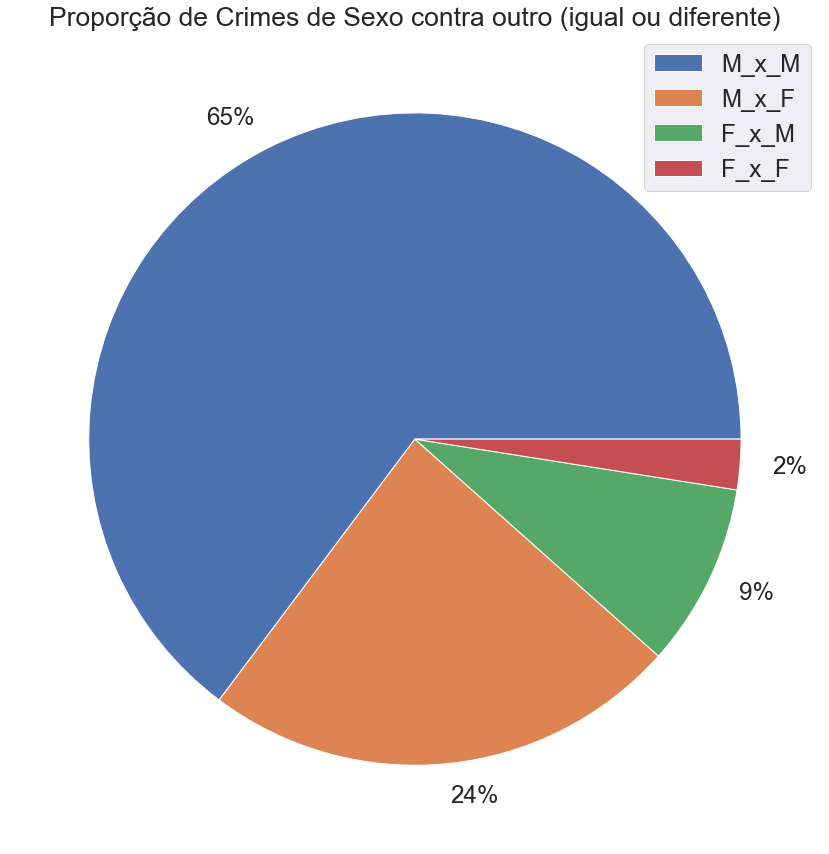

In [20]:
# Define a quantidade de crimes para cada relação M_x_M, F_x_F e etc ()
r = hmds['Relação'].value_counts()
print(r)
print(r.index.values.tolist())
# Define a quantidade de crimes em porcentagem (proporção)
p = round((r/sum(r))*100)

labels = [" "]*len(p)
for i in range(0, len(p)):
    labels[i] = str(int(p[i])) + "%"
    
colors = sns.color_palette()[0:len(p)]
sns.set(font_scale = 2.2)

plt.rcParams['figure.figsize'] = [15, 15]
#plt.pie(r, colors = colors, autopct='%.0f%%')
plt.pie(r, colors = colors, labels = labels)
plt.title("Proporção de Crimes de Sexo contra outro (igual ou diferente)")
plt.legend(labels = ("M_x_M","M_x_F","F_x_M","F_x_F"))
plt.show()

### Quais as armas mais usadas para cada sexo?

In [9]:
# Analisa a variável 'Weapon'
hmds.info()
print(hmds['Weapon'].value_counts())
print('\n')
# Desconsidera os casos em que a arma é desconhecida e crima um novo dataset para fazer análises considerando armas
hmdsArmas = hmds[hmds['Weapon']!='Unknown']
print(hmdsArmas['Weapon'].value_counts())
print('\n')
hmdsArmas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387171 entries, 0 to 387170
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             387171 non-null  int64 
 1   Perpetrator Sex  387171 non-null  object
 2   Victim Sex       387171 non-null  object
 3   Weapon           387171 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.8+ MB
Handgun          181749
Knife             67874
Blunt Object      46878
Shotgun           22902
Firearm           19703
Rifle             17013
Unknown           16436
Strangulation      4138
Fire               3662
Suffocation        2709
Drugs              1324
Gun                1035
Drowning            890
Explosives          360
Poison              349
Fall                149
Name: Weapon, dtype: int64


Handgun          181749
Knife             67874
Blunt Object      46878
Shotgun           22902
Firearm           19703
Rifle             17013
Strang

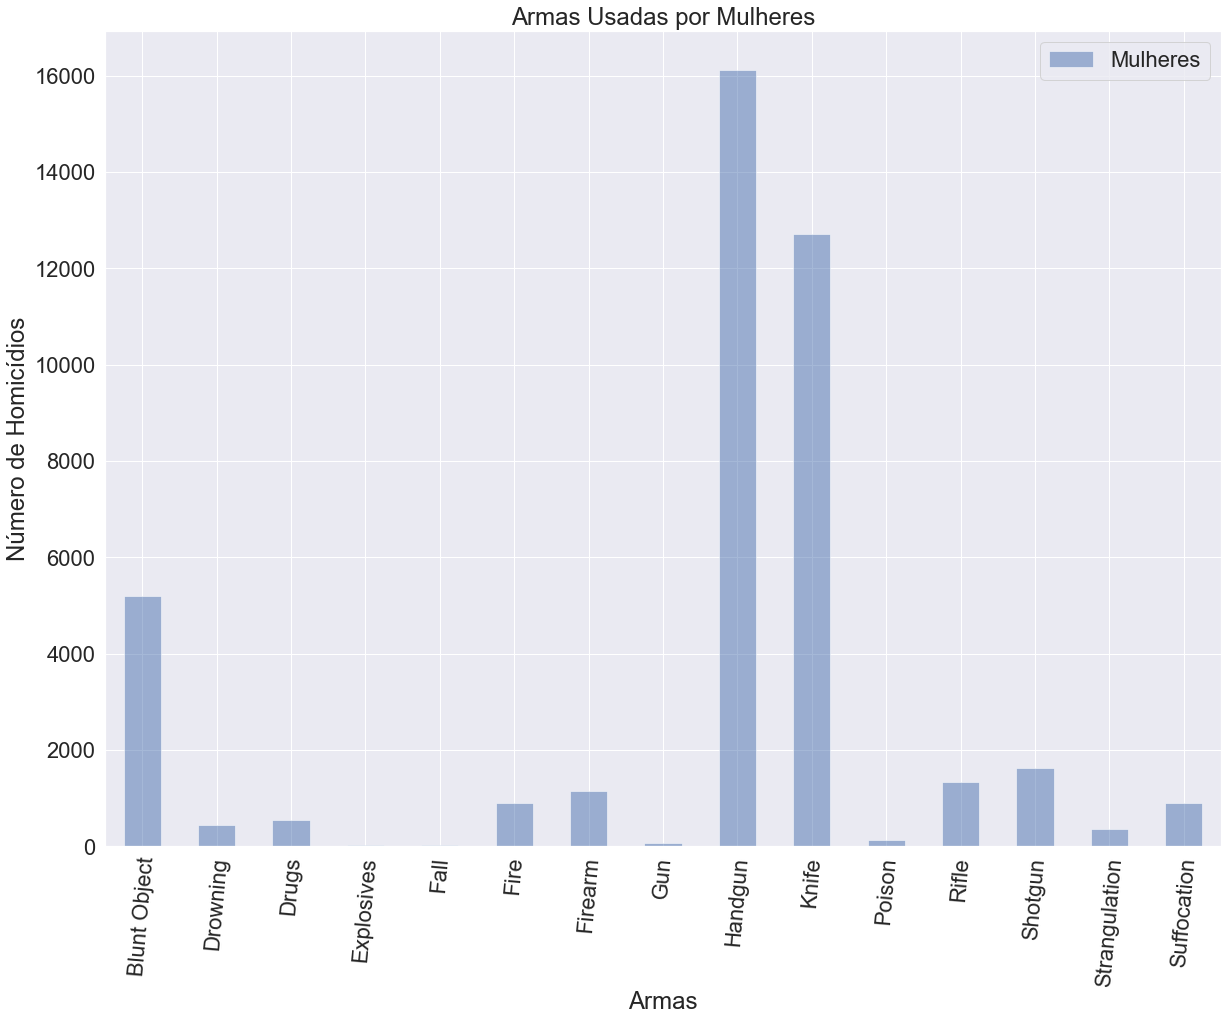

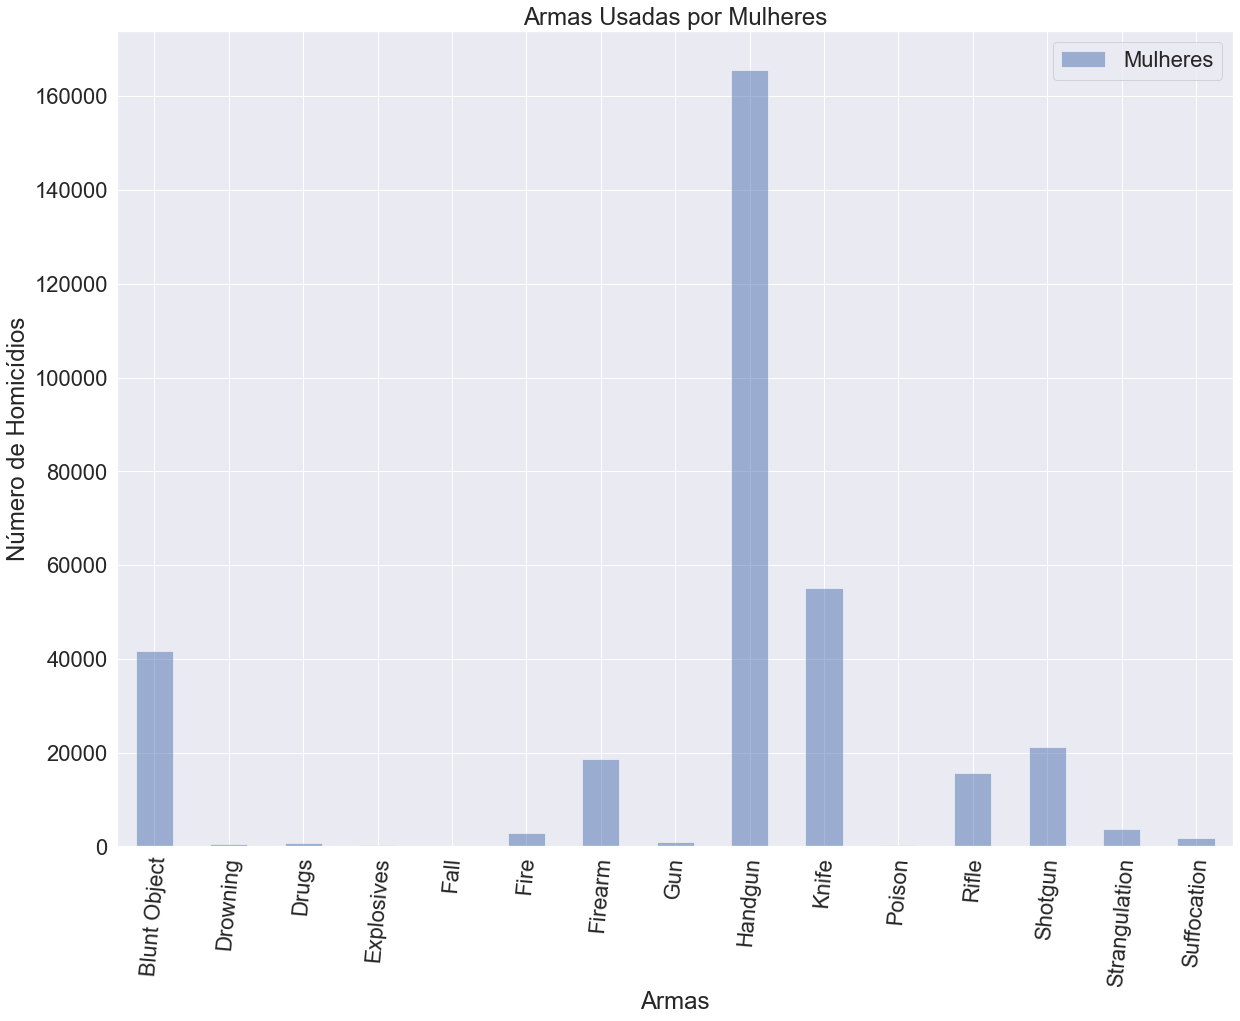

In [22]:
def barplotFigure(df, titleName, labelName, xLabel, yLabel):
    ax = df.plot(kind='bar', legend=True, alpha=0.5, label=labelName)
    plt.title(titleName)
    plt.xlabel(xLabel)
    plt.xticks(rotation=85)
    plt.ylabel(yLabel)

women_only = hmdsArmas[hmdsArmas['Perpetrator Sex']=='Female']
men_only = hmdsArmas[hmdsArmas['Perpetrator Sex']=='Male']    

sns.set(font_scale = 2)
plt.rcParams['figure.figsize'] = [20, 15]
barplotFigure(df=women_only.groupby(['Weapon']).size(), titleName='Armas Usadas por Mulheres', labelName='Mulheres', xLabel='Armas', yLabel='Número de Homicídios')
plt.show()
barplotFigure(df=men_only.groupby(['Weapon']).size(), titleName='Armas Usadas por Mulheres', labelName='Mulheres', xLabel='Armas', yLabel='Número de Homicídios')
plt.show()

## Análise de associação das variáveis 'Victim Sex' e 'Perpetrator Sex'

In [23]:
# Cria a tabela de contigência
tabelaContigencia = pd.crosstab(dsTrabalho['Perpetrator Race'],dsTrabalho['Victim Race'])
tabelaContigencia.head(10)

Victim Race,Asian/Pacific Islander,Black,Native American/Alaska Native,Unknown,White
Perpetrator Race,,,,,
Asian/Pacific Islander,3456,480,26,52,1330
Black,967,151517,322,649,26264
Native American/Alaska Native,33,162,1807,20,1198
Unknown,73,452,24,1144,1040
White,1494,14989,1059,948,177665


In [24]:
from scipy.stats import chi2_contingency

# Teste Chi-square considerando as ipóteses H0 e H1
# H0 -> as duas variáveis são independentes (não exiete associação)
# H1 -> existe associação entre as duas variáveis
stat, pv, dof, expected = chi2_contingency(tabelaContigencia)
print(stat, pv, dof)
print('\n')
#print(expected)
print('\n')

# Variável pv contém o valor de P-Value 
# P-Value é a probabilidade de H0 ser verdadeira
# Aqui é considerado o nível de significância alpha = 5% = 0.05
# Se P-Value > 0.05 then only we Accept the assumption(H0)
print('P-Value: ',pv)
print('\n')

alpha = 0.05
if pv <= alpha:
    print('Dependente (rejeita H0)')
else:
    print('Independente (aceita H0)')

554344.0062555695 0.0 16




P-Value:  0.0


Dependente (rejeita H0)


## Análise da Correlação entre as Variáveis 'Victim Sex','Victim Race','Perpetrator Sex','Perpetrator Race','Relationship' e 'Weapon'

In [12]:
# dsCorr -> é o dataset usado para se avaliar a correlação entre as variáveis
# Foi desconsiderado os dados desconhecidos sobre as variáveis 'Victim Race' e 'Perpetrator Race'

dsCorr = dsTrabalho[['Victim Sex','Victim Race','Perpetrator Sex','Perpetrator Race','Relationship','Weapon']]
dsCorr = dsCorr[(dsCorr['Victim Race']!='Unknown') & (dsCorr['Perpetrator Race']!='Unknown')]
dsCorr.info()
print('\n')
print(dsCorr['Victim Race'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382769 entries, 0 to 387170
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Victim Sex        382769 non-null  object
 1   Victim Race       382769 non-null  object
 2   Perpetrator Sex   382769 non-null  object
 3   Perpetrator Race  382769 non-null  object
 4   Relationship      382769 non-null  object
 5   Weapon            382769 non-null  object
dtypes: object(6)
memory usage: 20.4+ MB


White                            206457
Black                            167148
Asian/Pacific Islander             5950
Native American/Alaska Native      3214
Name: Victim Race, dtype: int64


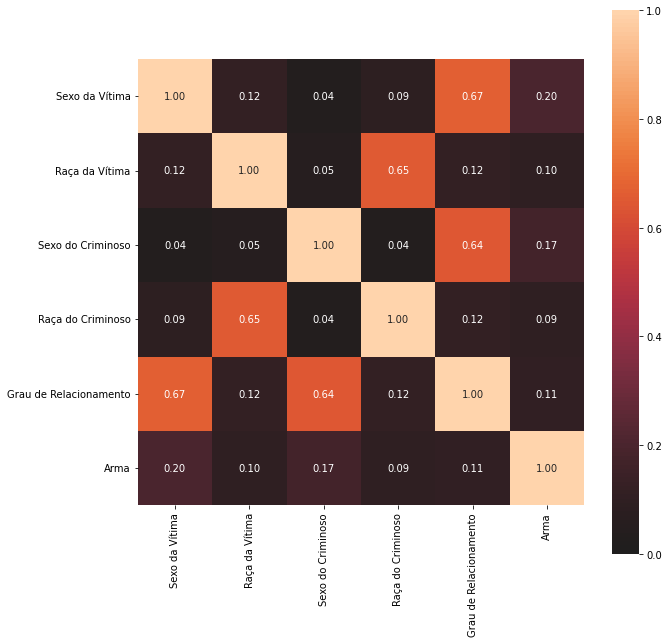

{'corr':                         Sexo da Vítima  Raça da Vítima  Sexo do Criminoso  \
 Sexo da Vítima                1.000000        0.115135           0.038714   
 Raça da Vítima                0.115135        1.000000           0.053855   
 Sexo do Criminoso             0.038714        0.053855           1.000000   
 Raça do Criminoso             0.086480        0.653585           0.035241   
 Grau de Relacionamento        0.665428        0.115522           0.642541   
 Arma                          0.201475        0.096720           0.174270   
 
                         Raça do Criminoso  Grau de Relacionamento      Arma  
 Sexo da Vítima                   0.086480                0.665428  0.201475  
 Raça da Vítima                   0.653585                0.115522  0.096720  
 Sexo do Criminoso                0.035241                0.642541  0.174270  
 Raça do Criminoso                1.000000                0.116329  0.094875  
 Grau de Relacionamento           0.116329       

In [13]:
from dython.nominal import associations

dsCorr = dsCorr.rename(columns={'Victim Sex':'Sexo da Vítima',
                       'Victim Race':'Raça da Vítima','Perpetrator Sex':'Sexo do Criminoso',
                       'Perpetrator Race':'Raça do Criminoso',
                       'Relationship':'Grau de Relacionamento',
                       'Weapon':'Arma'})

# associations(df, filename= 'complete_correlation.png', figsize=(10,10))
associations(dataset=dsCorr,figsize=(10,10))

In [51]:
# Crameersv() mede a correlação V de Cramer
# Wiki: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
# Ref: 
# Bergsma, Wicher (2013). "A bias correction for Cramér's V and Tschuprow's T". Journal of the Korean Statistical Society. 42 (3): 323–328. doi:10.1016/j.jkss.2012.10.002
def cramersvClassico(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    return np.sqrt(phi2/min((k-1),(r-1)))

def cramersvBergsma(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

print(cramersvClassico(hmdsArmas['Perpetrator Sex'],hmdsArmas['Weapon']))
print(cramersvBergsma(hmdsArmas['Perpetrator Sex'],hmdsArmas['Weapon']))
print('\n')
print(cramersvClassico(dsCorr['Sexo do Criminoso'],dsCorr['Arma']))
print(cramersvBergsma(dsCorr['Sexo do Criminoso'],dsCorr['Arma']))


0.17127622843933119
0.17116618395781794


0.17438222702576947
0.17427005542204646


## Classificação Usando KNN e PSO.

### Otimização dos Hiperparâmetros atravéz do PSO (Particle Swarm Optimization).

In [87]:
# ml -> dataset base para o modelo knn
ml = dsTrabalho.copy()
ml = ml.reset_index()
ml = ml[(ml['Victim Race']!='Unknown') & (ml['Perpetrator Race']!='Unknown')]

ml['Victim Sex'] = ml['Victim Sex'].astype('category')
ml['Victim Race'] = ml['Victim Race'].astype('category')
ml['Perpetrator Race'] = ml['Perpetrator Race'].astype('category')
ml['Perpetrator Sex'] = ml['Perpetrator Sex'].astype('category')
ml['Weapon'] = ml['Weapon'].astype('category')
ml['State'] = ml['State'].astype('category')
ml['City'] = ml['City'].astype('category')


In [88]:
# Codificação das variáveis categóricas
labelencoder = LabelEncoder()
for i in ml:
    if ml[i].dtype.name == "category":
        ml[i] = labelencoder.fit_transform(ml[i])

In [89]:
dsml = ml[['City','State','Victim Sex','Victim Race',               
                   'Victim Age','Perpetrator Age']]

dsml2 = ml[['City','State','Victim Sex','Victim Race',               
                   'Victim Age','Perpetrator Race']]

dsml3 = ml[['City','State','Victim Sex','Victim Race',               
                   'Victim Age','Perpetrator Sex']]

In [90]:
'''
#Verificando se o encoding levou a alguma correlação indesejada
corr = dsCorr.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)
'''

"\n#Verificando se o encoding levou a alguma correlação indesejada\ncorr = dsCorr.corr()\nsns.set(rc={'figure.figsize':(11.7,8.27)})\nsns.heatmap(corr, \n        xticklabels=corr.columns,\n        yticklabels=corr.columns, annot=True)\n"

In [91]:
'''

dsCorr = dsCorr.reset_index()
dsml = dsCorr.copy()


# Reduzindo 50% dos dados para que o modelo seja executado de modo rápido
# AINDA NÃO TENHO ACESSO A UM SUPERCOMPUTADOR HAHAHAHA
dsml = dsml.sample(n = int(dsCorr.shape[0]*0.5))

                     
print(dsml.shape)
print(dsCorr.shape)
                     

x_data = np.delete(x_data,np.arange(int(len(x_data)*0.9),dtype='i'))
y_data = np.delete(y_data,np.arange(int(len(y_data)*0.9),dtype='i'))


'''

"\n\ndsCorr = dsCorr.reset_index()\ndsml = dsCorr.copy()\n\n\n# Reduzindo 50% dos dados para que o modelo seja executado de modo rápido\n# AINDA NÃO TENHO ACESSO A UM SUPERCOMPUTADOR HAHAHAHA\ndsml = dsml.sample(n = int(dsCorr.shape[0]*0.5))\n\n                     \nprint(dsml.shape)\nprint(dsCorr.shape)\n                     \n\nx_data = np.delete(x_data,np.arange(int(len(x_data)*0.9),dtype='i'))\ny_data = np.delete(y_data,np.arange(int(len(y_data)*0.9),dtype='i'))\n\n\n"

In [92]:
# dsml['Arma'] = labelencoder.fit_transform(dsml['Arma'])
# Transformando no formato numpy

strg = 'Perpetrator Age'
strg2 = 'Perpetrator Race'
strg3 = 'Perpetrator Sex'

x_data = dsml.loc[:, dsml.columns != strg].to_numpy()

# Normalizar x_data
x_data=(x_data-x_data.min())/(x_data.max() - x_data.min())

y_data = dsml[strg].to_numpy()


In [93]:
# Divisão do conjunto de teste e treinamento
X_train, X_test, y_train, y_test =  train_test_split(x_data, y_data , random_state=1, test_size=.25)

# Técnica SMOTE - "balanceamento" dos dados


'''
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)
'''



# Conjunto de validação
X_train_o, X_test_o, y_train_o, y_test_o =  train_test_split(X_train, y_train , random_state=1, test_size=.3333)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )
print(X_train_o.shape, y_train_o.shape, X_test_o.shape, y_test_o.shape )

(287076, 5) (287076,) (95693, 5) (95693,)
(191393, 5) (191393,) (95683, 5) (95683,)


#### PSO - otimizando os hiperparâmetros

In [94]:
# Função fitness
def fitness(k,X_train,y_train,X_test,y_test):
    #escolha do tipo de calculo de distância
    if int(k[0,0])==1:
        metric = 'euclidean'
    elif int(k[0,0])==2:
        metric = 'chebyshev'
    else:
        metric = 'manhattan'

    clf = KNeighborsClassifier(n_neighbors = int(k[0,1]), metric = metric)
    clf.fit(X_train, y_train)
    # Buscando a acurácia
    acc = classification_report(y_test, clf.predict(X_test), output_dict=True)['accuracy']
    # A acurácia (acc) é uma função linear que varia de 0% a 100%. Logo o seu mínimo é 0% e o seu mínimo representa o
    # pior caso do KNN. No entanto, queremos o melhor caso -> tendência para 100%
    # Como o PSO trabalha referenciando o mínimo da função como o melhor caso, então temos que retornar 1-acc
    # tendência para 100%
    return 1-acc 

# Limites da fronteira do PSO -> são os hiperparâmetros de KNN que serão referênciados na função fitness
# Note que na função fitness estamos considerando dois hiperparâmetros: o K e a métrica do KNN
# Maior valor de k 100 
max_bound = np.array([4,101])
# Menor valor de k 1
min_bound = np.array([1,1])
bounds = (min_bound, max_bound)

# Hiperparametros do PSO
options = {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
# Otimizador do PSO
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options, bounds = bounds )
# Buscando os melhores valores para os hiperparâmetros do KNN (pos)
cost, pos = optimizer.optimize(fitness, iters = 100, X_train=X_train_o ,y_train=y_train_o,X_test=X_test_o,y_test=y_test_o)
#cost, pos = optimizer.optimize(fitness, iters = 100, X_train=X_train ,y_train=y_train,X_test=X_test,y_test=y_test)

2021-11-11 18:54:14,390 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.3, 'c2': 0.3, 'w': 0.5}
pyswarms.single.global_best:   0%|                                                                               |0/100C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1

pyswarms.single.global_best:   8%|█████                                                          |8/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  16%|█████████▉                                                    |16/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  24%|██████████████▉                                               |24/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  32%|███████████████████▊                                          |32/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  40%|████████████████████████▊                                     |40/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  48%|█████████████████████████████▊                                |48/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  56%|██████████████████████████████████▋                           |56/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  64%|███████████████████████████████████████▋                      |64/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  72%|████████████████████████████████████████████▋                 |72/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  80%|█████████████████████████████████████████████████▌            |80/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  88%|██████████████████████████████████████████████████████▌       |88/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

pyswarms.single.global_best:  96%|███████████████████████████████████████████████████████████▌  |96/100, best_cost=0.94C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

### Resultado - Variável Target:  Sexo do Criminoso

In [77]:
# Buscando a métrica(KNN) encontrada (otimisação) no PSO
if int(pos[0])==1:
    metric = 'euclidean'
elif int(pos[0])==2:
    metric = 'chebyshev'
else:
    metric = 'manhattan'
    
# Instanciando o KNN com as metricas e o valor de K (n_neighbors = int(pos[0]) encontrado no PSO
clf = KNeighborsClassifier(metric = metric, n_neighbors = int(pos[1])  )
# Treinando o knn
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.38      0.01      0.03     11005
           1       0.89      1.00      0.94     84688

    accuracy                           0.88     95693
   macro avg       0.63      0.51      0.48     95693
weighted avg       0.83      0.88      0.83     95693



### Resultado - Variável Target:  Raça do Criminoso

In [86]:
# Buscando a métrica(KNN) encontrada (otimisação) no PSO
if int(pos[0])==1:
    metric = 'euclidean'
elif int(pos[0])==2:
    metric = 'chebyshev'
else:
    metric = 'manhattan'
    
# Instanciando o KNN com as metricas e o valor de K (n_neighbors = int(pos[0]) encontrado no PSO
clf = KNeighborsClassifier(metric = metric, n_neighbors = int(pos[1])  )
# Treinando o knn
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.07      0.12      1378
           1       0.76      0.73      0.74     44344
           2       0.70      0.03      0.05       809
           3       0.75      0.80      0.77     49162

    accuracy                           0.75     95693
   macro avg       0.70      0.41      0.42     95693
weighted avg       0.75      0.75      0.74     95693



### Resultado - Variável Target:  Idade do Criminoso

In [95]:
# Buscando a métrica(KNN) encontrada (otimisação) no PSO
if int(pos[0])==1:
    metric = 'euclidean'
elif int(pos[0])==2:
    metric = 'chebyshev'
else:
    metric = 'manhattan'
    
# Instanciando o KNN com as metricas e o valor de K (n_neighbors = int(pos[0]) encontrado no PSO
clf = KNeighborsClassifier(metric = metric, n_neighbors = int(pos[1])  )
# Treinando o knn
clf.fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          18       0.10      0.20      0.13      4698
          19       0.07      0.15      0.10      5062
          20       0.08      0.19      0.11      5254
          21       0.06      0.10      0.08      4779
          22       0.05      0.08      0.06      4644
          23       0.05      0.07      0.06      4373
          24       0.05      0.06      0.06      4007
          25       0.05      0.08      0.07      4323
          26       0.04      0.04      0.04      3615
          27       0.05      0.04      0.05      3534
          28       0.04      0.04      0.04      3217
          29       0.04      0.03      0.04      3066
          30       0.05      0.06      0.05      3327
          31       0.04      0.03      0.04      2647
          32       0.03      0.02      0.03      2633
          33       0.03      0.02      0.02      2409
          34       0.04      0.02      0.02      2330
          35       0.04    

C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\John\anaconda3\envs\DataScience\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------